# MACHINE LEARNING AND STATISTICS PROJECT

## THE BOSTON HOUSE PRICES DATASET

## HUGH O'REILLY

## H.DIP Data Analytics GMIT


## INTRODUCTION
 ___

The Boston Housing Dataset consists of information derived from US census data of housing in the Boston Mass. area of the US. The publication originally discussed the problems associated with the use of housing market data to measure the willingness to pay for clean air.

The dataset is taken from census tracts in the Boston Standard Metropolitan Statistical Area in 1970.

*The data was originally published by Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.*

Ref [https://www.sciencedirect.com/science/article/abs/pii/0095069678900062%5D]

## OBJECTIVE
___

* To investigate if there is a significant difference in the median house prices between houses that are along the Charles River and those which aren't

* To attempt to predict the median house price based on other variables in the dataset

Understanding if there is a difference between the houses along the Charles River will help determine the investment value of properties in the area

Similarly the ability to predict median house prices for a particular zone in Boston, based on the other variables associated with the property will enable us to determine the value of a property in a particular area and whether it may be worth investing in the area

#TODO Insert image of boston

## IMPORT AND SORT THE DATASET

___


In [1]:
#IMPORT LIBRARIES

#Scipy Libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Seaborn library
import seaborn as sns
#Keras libraries
import keras as kr
from keras import losses
from keras import regularizers

#Scikitlearn Libraries
import sklearn
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV
import sklearn.decomposition as dec
import sklearn.preprocessing as pre

%matplotlib inline

#IMPORT THE BOSTON HOUSE PRICES DATASET from sklearn
   
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
boston = load_boston()

# Display the shape of the dataset
print(boston.data.shape)

# Ref [2]


Using TensorFlow backend.


(506, 13)


### INVESTIGATE AND SORT THE DATASET
___

In [2]:
#Determine the dataset type

type(boston)

sklearn.utils.Bunch

The `type(boston)` command tells us that the dataset is a `sk.utils.Bunch` dataset type

A 'bunch' dataset type:  Dictionary-like object, the interesting attributes are: ‘data’, the data to learn, ‘target’, the classification labels, ‘target_names’, the meaning of the labels, ‘feature_names’, the meaning of the features, ‘DESCR’, the full description of the dataset, ‘filename’. 

Ref [https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html]

In [3]:
#Display a desciption of the dataset

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

The Data consists of 506 rows and 13 columns i.e. 506 instances containing 13 numeric/categorical variables as described above. 

There are 13 attribute variables an 1 target variable 'MEDV': which represents the median value for houses in each area i.e. 506 areas of Boston

In [4]:
# Show the first 10 rows of the Dataset
bos = pd.DataFrame(boston.data)
bos.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


It can be seen above that the dataset has no feature labels which will need to be added (although they are imported in the 'dataset characteristics'). In order to do so we need to use the `pandas.dataframe.keys()` command to access the keys and then assign them to the attribute columns.

Ref [https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.keys.html]

In [5]:
# Identify the indices in the dataset

bos.keys()

RangeIndex(start=0, stop=13, step=1)

In [6]:
#Passing the `feature_names` parameter to the dataset now assigns the attributes with their labels

bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Only 13 attributes are shown, although 14 attributes are associated with the dataset. The 14th attribute, or target variable - MEDV     Median value of owner-occupied homes in $1000's must be added to the `bos` pandas array

In [7]:
#The price is identified as the target variable above so we will see if is there

#boston.target #This prints the array of target variables (MEDV)

In [8]:
#We now add the target variable (MEDV) to the array as 'price'

bos['PRICE'] = boston.target
print(bos.head())

#ref [https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef]

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


## DESCRIPTIVE STATISTICS
___

In [9]:
#Table with summary statistics of the dataset
bos.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


**HISTOGRAMS OF HOUSE PRICE VARIABLES**

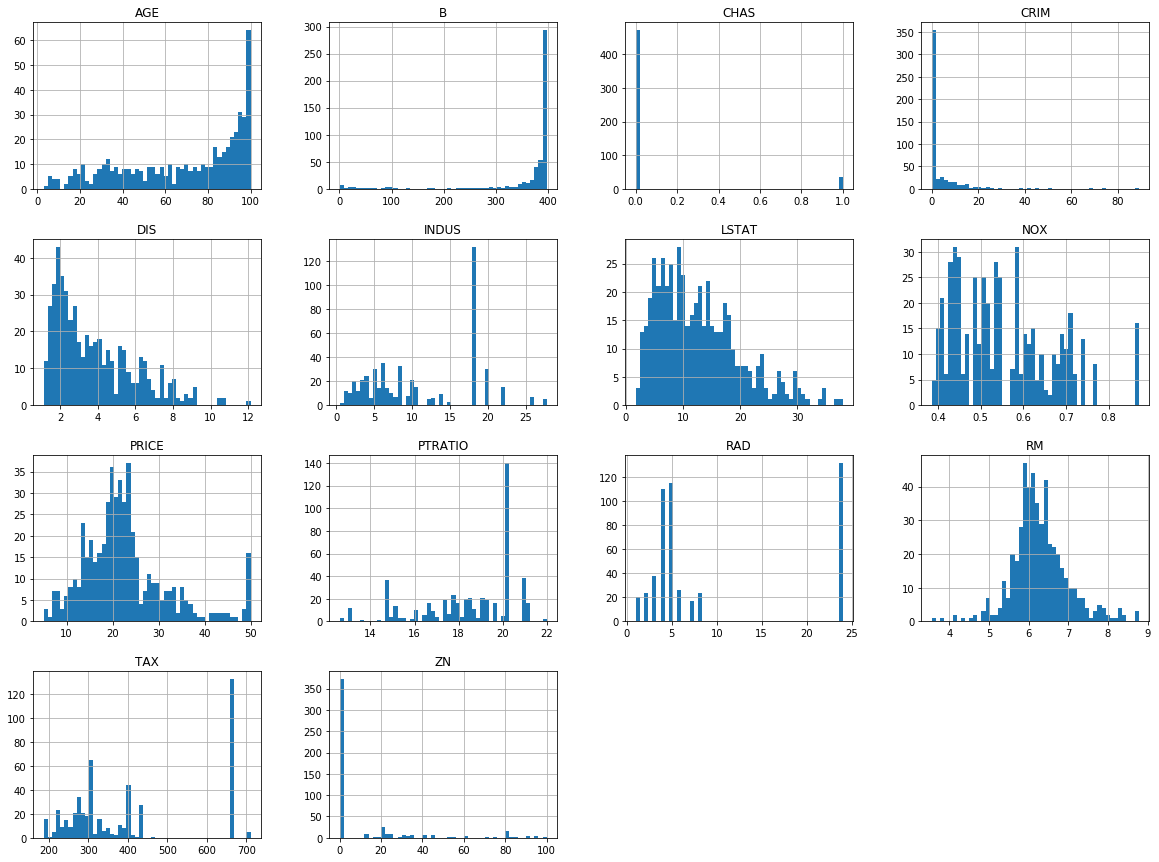

In [10]:
#Histograms of House Price Variables using matplotlib
bos.hist(bins=50, figsize=(20,15))
plt.show()

### Selected Observations from the Summary Stats Table
___

* **The target variable - 'PRICE' has a range of $5000 - $50000 with a mean of $22,532 which is a significant variation in house prices across the city.**


* The 'CHAS' variable - proximity to the Charles River is logisitic in nature (i.e. 1 or 0)


* Per Capita crime rate varies significantly across the city from 0.00632 to 88.9762

### **OUTLIERS**

Z-Scores determined for outliers and new df created `bos_o` with outliers removed.

In [11]:
z = np.abs(stats.zscore(bos))

In [12]:
bos_o = bos[(z < 3).all(axis=1)]

### Distribution of Prices Data
___

In [13]:
#Set the target variable to y

y = bos['PRICE']*1000

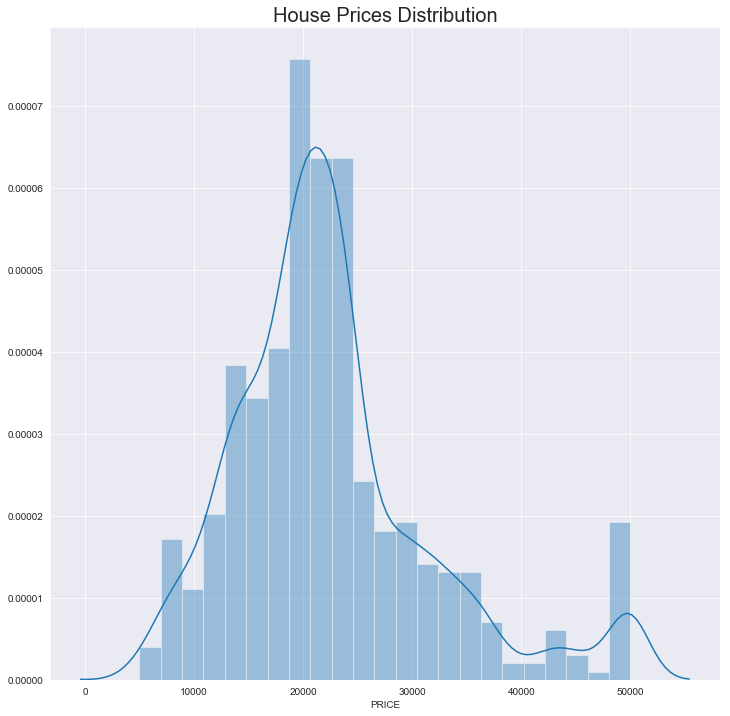

In [14]:
#Use the Seaborn library to display the distribution of house prices
sns.set_style("darkgrid")
plt.figure(figsize=(12, 12))
plt.title('House Prices Distribution', size=20)
ax = sns.distplot(y)

The plot above which displays the distribution of house prices in the dataset 'appears' to follow a **normal distribution.**

**Some other observations**

* The highest distribution is centred approximately around the mean ($20,000)

* There are a notably high number of houses around the max ($50,000)

Although the prices 'look' like they follow a normal distribution i.e. a bell-curve or gaussian distribution, it would be prudent to definitively determine the distribution as the distribution of the data will determine what inferential statistical analysis should be carried out.- **we will next carry out a test for normality.**

**Shapiro-Wilk Test for Normality**

The Shapiro-Wilk test tests the null hypothesis $H_0$ that the sample comes from the normal distribution. Therefore at a significance level of 0.05 a $p$ < 0.05 indicates non-normality
Ref[http://www.bios.unc.edu/~mhudgens/bios/662/2008fall/Backup/wilkshapiro1965.pdf]

In [15]:
from scipy.stats import shapiro #import the Shapiro-Wilks function

shapiro_test = shapiro(y) #run the Shapiro Wilks tets on the house price data

stat, p = shapiro_test
print('Test Statistic=%.3f, p=%.4f' % (stat, p))

Test Statistic=0.917, p=0.0000


The Shapiro-Wilk test above *rejects* the null hypothesis since the *p* value is less than 0.05, therefore the data for 'PRICE' is not normally distributed. In addition the test statistic is 0.917 which indicates that this result is likely valid and not a type 1 error. Further visualisation may be carried out using a **Q-Q plot**

A Q-Q plot plots quantiles (values that split a data set into equal portions of the data) against the theoretical quantiles of a normal distribution. 

Ref[https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3693611/?source=post_page-----6bf06ed646a9----------------------]

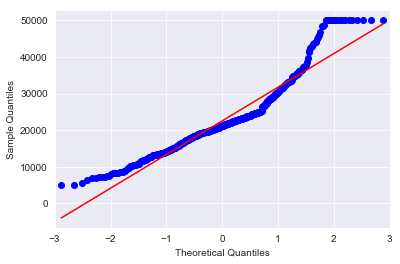

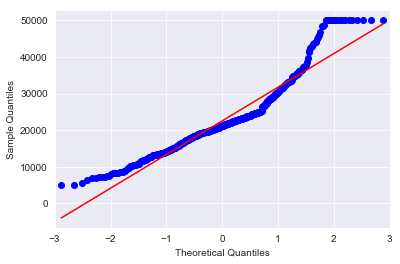

In [16]:
sm.qqplot(y, line='s') #generate a q-q plot of the house price data

Investigating possible reasons for the non-normality of the 'PRICES' data and specifically what, if any effects are causing the skew of data towards higher value houses may be worthwhile.

### RELATIONSHIPS BETWEEN VARIABLES
___

A correlation heatmap is a useful way to quickly visualise the relationships between variables and determine which variables are highly correlated and worth further investigation.

Ref [https://seaborn.pydata.org/generated/seaborn.heatmap.html]


**CORRELATIONS**

The correlations between input variables and PRICE are ranked below in descending order

In [17]:
corr_matrix = bos.corr()
corr_matrix['PRICE'].sort_values(ascending=False)

PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

**Highest correlations are RM, ZN and B**

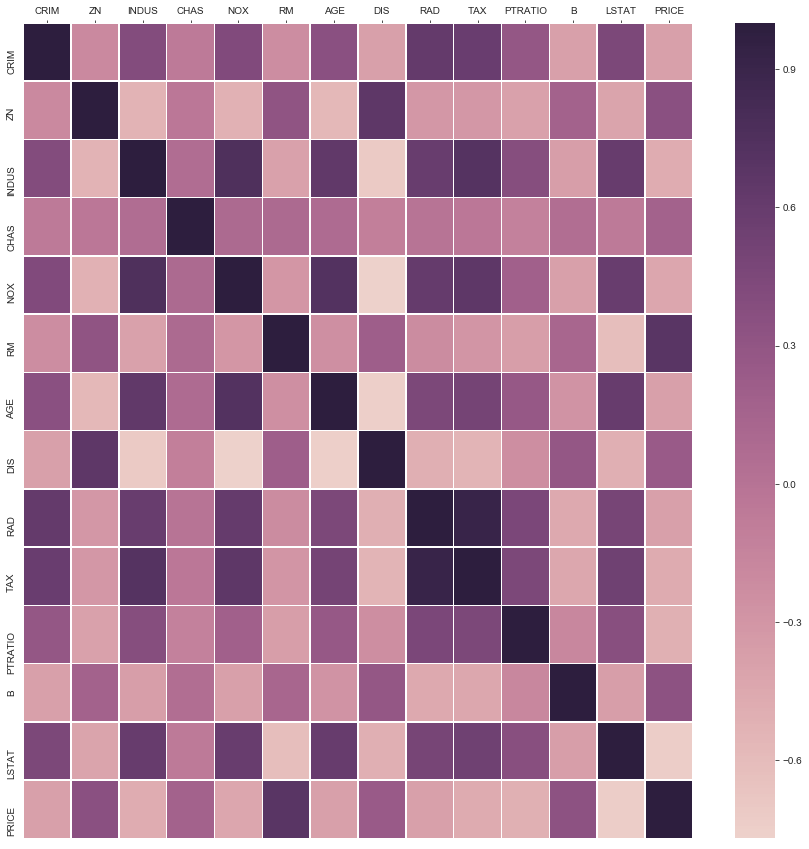

In [18]:
plt.figure(figsize=(15, 15)) #sets the parameters for the figure size 
ax = sns.heatmap(bos.corr(), cmap=sns.cubehelix_palette(as_cmap=True), linewidths=0.5) #generates heatmap, colour scheme and linewidth
ax.xaxis.tick_top() #sets the axis to the top of the chart for easier reading

The above correlation matrix highlights some interesting relationships between the target variable, PRICE and other variables:

* There is a high positive correlation between PRICE and RM - (Average number of rooms per dwelling)

* There is a positive correlation between PRICE and ZN - (proportion of residential land zoned for lots over 25,000 sq.ft.)

* There is a negative correlation between PRICE and LSTAT - (% lower status of the population)

* There is a negative correlation between PRICE and PTRATIO - (pupil-teacher ratio by town)

The correlation matrix is only relevant to variables where there is a integer value. The Charles river variable is logistic in nature (i.e. 1 or 0) so is not relevant to this analysis.

## INFERENTIAL STATISTICS

We will now use inferential statistics to analyse the relationship between the median house prices 'PRICE' ('MEDV'in the original dataset) and whether or not the houses border the Charles river 'CHAS'

In [19]:
# Split the data into house proces which border the River and those who dont
    
River = bos.loc[bos['CHAS'] != 0]
Not_River = bos.loc[bos['CHAS'] != 1]

In [20]:
#Create 2 Arrays of Prices along River and not along river

River_Price = River['PRICE']
Not_River_Price = Not_River['PRICE']

In [21]:
#Summary statistics for house prices bordering river
River_Price.describe().T


count    35.000000
mean     28.440000
std      11.816643
min      13.400000
25%      21.100000
50%      23.300000
75%      33.150000
max      50.000000
Name: PRICE, dtype: float64

In [22]:
#Summary statistics for house prices not bordering river
Not_River_Price.describe().T

count    471.000000
mean      22.093843
std        8.831362
min        5.000000
25%       16.600000
50%       20.900000
75%       24.800000
max       50.000000
Name: PRICE, dtype: float64

I can be seen above that in simple terms, the mean house price of houses bordering the river is 28,440 dollars whereas the mean house price of houses not bordering the river is 22,093 dollars.

We will take a further look at how both sets of prices are distributed, using boxplots

### BOX PLOTS OF HOUSE PRICES BORDERING/NOT BORDERING RIVER

Text(0.5,1,'House Prices Not Bordering River and Bordering River')

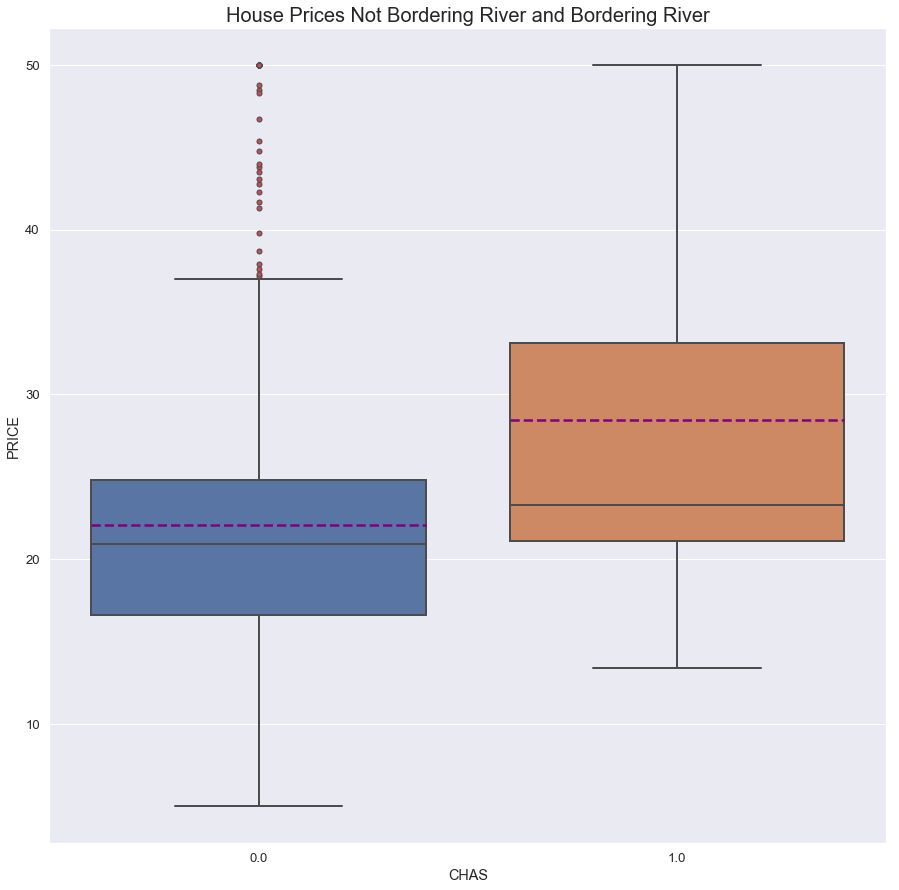

In [23]:
plt.figure(figsize=(15, 15))
red_circle = dict(markerfacecolor='r', marker='o')
sns.set(font_scale=1.2)
ax=sns.boxplot(x="CHAS", y="PRICE",data=bos, linewidth=2.0, flierprops=red_circle, showmeans=True , meanline=True, meanprops = dict(linestyle='--', linewidth=2.5, color='purple'))
ax.set_title('House Prices Not Bordering River and Bordering River', size=20)


The boxplots of the median house price for houses bordering the river (CHAS=1) and those not bordering the river (CHAS=0) appear quite different, suggesting that it may be worth investigating if this difference is statistically significant.
* The array containing houses not bordering the river has a number of outliers at the upper end
* The array containing houses bordering the river has a mean which is higher than those not bordering the river (**purple dashed line in boxplot**). Additionally, the mean of house prices bordering the river is significantly higher than the median compared to the house prices of those not bordering the river.

### DISTRIBUTION PLOTS OF HOUSE PRICES BORDERING/NOT BORDERING RIVER

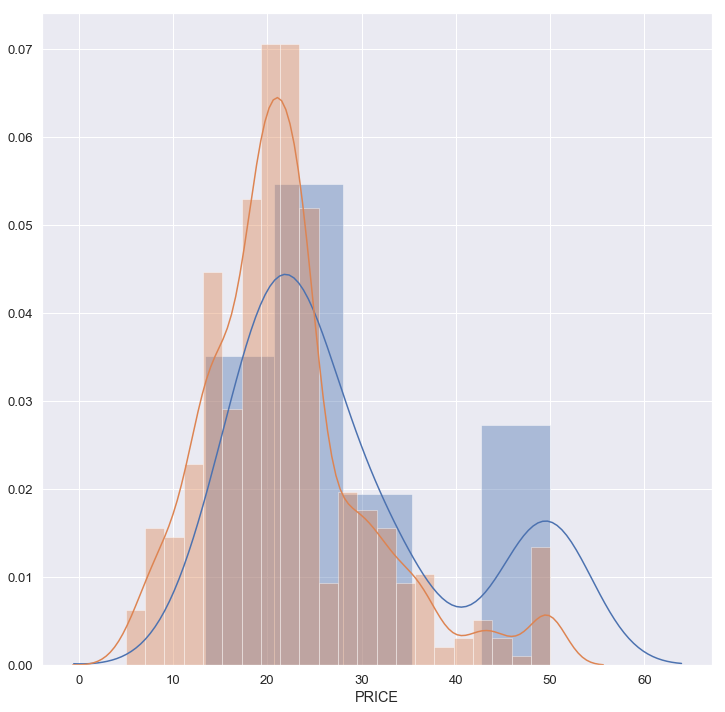

In [24]:
sns.set_style("darkgrid")
plt.figure(figsize=(12, 12))
ax1 = sns.distplot(River_Price)
ax2 = sns.distplot(Not_River_Price)

The distribution plots of house prices bordering/not bordering the river don't highlight the differences in the two datasets as well as the boxplots do, but the distributions illustrate how both distributions have a similar shape

### NORMALITY CHECK ON HOUSE PRICES BORDERING/NOT BORDERING RIVER

In [25]:
#Check the two house price data sets for normality using the Shapiro-Wilks test

shapiro_test1 = shapiro(Not_River_Price) 
shapiro_test2 = shapiro(River_Price) 

stat1, p1 = shapiro_test1
stat2, p2 = shapiro_test2
print('Test Statistic : Not Bordering River =%.3f, p=%.4f' % (stat1, p1))
print('Test Statistic : Bordering River =%.3f, p=%.4f' % (stat2, p2))

Test Statistic : Not Bordering River =0.928, p=0.0000
Test Statistic : Bordering River =0.836, p=0.0001


The normality test of the house prices bordering/not bordering the river both suggest that we can reject the null hypothesis, $H_0$, and accept the alternative hypothesis, $H_1$, the two sets are non-normal

**Although the data displays non-normality, (and the presence of outliers) - parametric tests of the house prices are still suitable due to the large sample sizes we have** 

REF [https://blog.minitab.com/blog/understanding-statistics/data-not-normal-try-letting-it-be-with-a-nonparametric-hypothesis-test]

This is also a satisfactory approach since the **Central Limit Theorem** states that given a sufficiently large sample size from a population (usually more than 30) with a finite level of variance, the mean of all samples from the same population will be approximately equal to the mean of the population.

**CENTRAL LIMIT THEOREM**

If X1, X2,...Xn is a random sample of size n taken from a population (either finite
or infinite) with mean $u$ and finite variance $\sigma^2$ , and if $\bar X$ is the sample mean, the limiting
form of the distribution of

$Z$ = $\frac{\bar X - u} {\frac{\sigma}{\sqrt n}}$


as n -->0, is the standard normal distribution.

REF[Applied Statistics and Probability for Engineers.; Montgomery,D.C.; Wiley; 2003]

### PAIRED T-TEST

In [26]:
#Carry out a paired t-test on the house prices bordering/not bordering the river

stats.ttest_ind(Not_River_Price, River_Price)

stat, p = stats.ttest_ind(Not_River_Price, River_Price)
print('Test Statistic = %.3f, p=%.4f' % (stat, p))

# REF [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html]

Test Statistic = -3.996, p=0.0001


A Test Statistic of -3.996 and  $p$ value of p=0.0001 suggest that we can reject the null hypothesis of equal means.

Therefore we can conclude that there is a difference in the mean house price between houses bordering the Charles River and those not bordering the Charles River

the following analysis was used as the basis for our investigation of descriptive and inferential statistics:

REF: [https://subscription.packtpub.com/book/programming/9781789804744/1/ch01lvl1sec11/our-first-analysis-the-boston-housing-dataset]

#  PREDICT 



## NEURAL NETWORK USING KERAS

In this section we will attempt to predict the house prices based on other variables using the Keras Neural Network library

REF [https://keras.io/]

**BUILD THE MODEL**

We have used 1 input layer with 14 neurons, 2 hidden layers with 4 neurons and 1 output layer. The input shape is the number of variables i.e. 13. The activation function is `relu` - Rectified Linear Unit. This activation function normalises the inputs.

`BatchNormalization` is added as a means of getting all the attributes on the same scale: This is important in datasets where the input variables vary greatly in scale. 

In [27]:
#Import relevant Keras libraries

#import the sequential model
from keras.models import Sequential
from keras.models import Model

from keras import optimizers 

#import the relevent layer types and activation
from keras.layers import Dense, Activation
# For encoding categorical variables.
import sklearn.preprocessing as pre



# For splitting into training and test sets.
import sklearn.model_selection as mod

#Create a new sequential model
def create_model():
    # create model
    
    model = Sequential()

#Introduce regularisation

    model.add(Dense(14, input_dim=(13), activation="relu",kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
    #model.add(Dense(64, input_dim=(13), activation="relu",kernel_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1(0.01)))
    
    kr.layers.BatchNormalization()
    #model.add(Dense(7, activation="relu"))
    model.add(Dense(4, activation="linear"))
    
    #kr.layers.BatchNormalization()
    model.add(Dense(4, activation="relu"))

    kr.layers.BatchNormalization()
    model.add(Dense(1, activation="linear"))
    #model.add(Dense(1, activation="linear"))
    
    model.summary()
    
    model.compile(optimizer="Adam", loss ="mean_absolute_error")
    
    return model
#Note: 23-Nov-19 - Number of neurons increased to 64 in line with original experimentation and from knowledge gained in REF

#[Deep Learning with Python: Chollet, F.; Manning; 2018]# pages 85-91

In [28]:
#Set the x and y parameters for independent and dependent variables

#Define the feature variables by assigning the column names as feature_names

boston_features = pd.DataFrame(boston.data, columns=boston.feature_names)

#x = boston_features[['ZN','RM', 'PTRATIO', 'LSTAT', 'CHAS']]
#x = pd.DataFrame(boston_features)
y = pd.DataFrame(boston.target, columns =['PRICE'])
x = pd.DataFrame(boston_features)
#drop some parameters to try and simplify the model
#x = pd.DataFrame(boston_features, columns=['ZN','PTRATIO','LSTAT','RM'])
#x = bos['CRIM', 'INDUS', 'CHAS','ZN', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'TAX']


**SCALING**

REF[https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html]

Scaling can be used to optimise models if the data is not normally distributed. In our case this dataset shows evidence of non-normality as shown in the 'histograms of house price labels' section above. This is achieved using the StandardScaler class in the  `preprocessing` Scikitlearn python library

It is a useful technique to be used on data which is non-normal. It is achieved by removing the mean of each feature and dividing by its standard deviation to bring all variables to the same scale. 

In [29]:
# https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing

#define the scope for the scaling function (the boston_features variables, add column names)
xscale = pd.DataFrame(pre.scale(x), columns=x.columns)


In [30]:
#define scaling as preprocessing standard scaler scikitlearn library
scaler = pre.StandardScaler()
scaler.fit(x)
#output the mean and scale of data
scaler.mean_, scaler.scale_

(array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
        5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
        9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
        1.26530632e+01]),
 array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
        1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
        8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
        7.13400164e+00]))

In [31]:
#scaler.transform function centres and scales the data
xscale = pd.DataFrame(scaler.transform(x), columns=x.columns)

**COMPILE THE MODEL**

Gradient descent is an optimisation algorithm which works by changing parameters of the input functions such as weights until the loss function converges on a minimum.

The model was initially compiled using a Stochastic Gradient Descent optimiser `sgd` and the loss function Mean Square Error `mse`.

Better results were found using the `Adam` optimiser and `mean_absolute_error`

* **Stochastic Gradient Descent optimiser**, as the name suggests picks a random instance in the training set and computes the gradient based only on that instance. This is in contrast to 'Batch gradient descent which uses the entire dataset to calculate the gradients which is slow (for a large dataset). Due to its random nature, the cost function for stochastic gradient descent will increase and decrease, over time approaching its minimum.
  

* **Mean Square Error** is a useful loss function for regression problems where a value is predicted from continuous variables.

* **Mean Absolute Error** Calculates the absolute error between training and test data
 
    REF [Applied Deep Learning with Python By Alex Galea, Luis Capelo August 2018]
    
    REF [Hands-On Machine Learning with Scikit-Learn, KERAS & TensorFlow; Geron, A.; O'Reilly; 2019, 2nd Ed]
    
Batch Normalisation `keras.layers.BatchNormalization` REF[https://keras.io/layers/normalization/]

"Normalises the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1."

It increases training speed and allows greater variation in the learning rate:
https://arxiv.org/abs/1502.03167

**Attempt to adjust learning rate to get better cost value**

In [32]:
#compile the model specifying the model optimiser and loss function

# Optimizers Tried
sgd = optimizers.SGD(lr=0.01, clipnorm=1.0)
Adam = kr.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999, amsgrad=False)
RMSprop = kr.optimizers.RMSprop(learning_rate=0.001, rho=0.9)
Adagrad = kr.optimizers.Adagrad(learning_rate=0.01)
Adadelta = kr.optimizers.Adadelta(learning_rate=1.0, rho=0.95)
Adamax = kr.optimizers.Adamax(learning_rate=0.002, beta_1=0.9, beta_2=0.999)
Nadam = kr.optimizers.Nadam(learning_rate=0.002, beta_1=0.9, beta_2=0.999)

#loss Functions tried
#model.compile(optimizer="Adam", loss ="mean_squared_error")
#model.compile(optimizer="Adam", loss ="mean_absolute_error")
#model.compile(optimizer="Adam", loss ="mean_absolute_percentage_error")
#model.compile(optimizer="Adam", loss ="mean_squared_logarithmic_error")
#model.compile(optimizer="Adam", loss ="hinge")
#model.compile(optimizer="Adam", loss ="log_cosh")
#model.compile(optimizer="Adam", loss ="huber_loss")

#changed to 'Adam' optimiser, loss mean_squared_error, 
#metrics added ref https://stackoverflow.com/questions/48775305/what-function-defines-accuracy-in-keras-when-the-loss-is-mean-squared-error-mse?rq=1
#model.compile(optimizer="Adam", loss ="mean_squared_error")


**CREATE A TRAINING AND TESTING SET**

Like all regression problems it is necessary to create a training `x_train` , `y_train` and testing set `x_test`, `y_test` with which to train the model to create predictions of our output variable and a testing set to test the accuracy of the predictive model we have created.

We have specified a `test_size` of 0.5 i.e. half the data will be used to test the model. - Subsequently adjusted to 0.2

In [33]:
# Define our training set: size of the test set is 0.2 i.e. 20% of the dataset
#random_state sets the seed for random assignment in order to maintain consistency
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.2, random_state = 42)
#x_train, x_test, y_train, y_test = x[train_index], x[test_index], y[train_index], y[test_index]

#x.loc[train_index]

**SCALING THE DATASET**

In [34]:
scaler = pre.StandardScaler()
scaler.fit(x_train)
x_train_scaled = pd.DataFrame(scaler.transform(x_train), columns=x.columns)

#x_train_scaled

`model.fit` Trains the model over a fixed number of epochs

**epochs**: are the number of epochs to train the model. An epoch is an iteration over the entire x and y data provided. 

REF[https://keras.io/models/model/]

`EarlyStopping` stops the model when it doesnt improve the cost function after a specified number of epochs of same loss value. `patience` defines the number of epochs of same loss value before stopping

REF [https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37]

Validation model also added:

Validation is a process of holding out part of the test set during optimisation in order to evaluate several candidate models and select the best one.

`validation_split`: Float between 0 and 1. Fraction of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch. The validation data is selected from the last samples in the x and y data provided, before shuffling. 

`Val_Loss` is the loss value calculated on the validation test set after each epoch

REF [https://keras.io/models/model/]

**GRADIENT DESCENT**



In [69]:
#Fit the model to the training set and calculate loss

#Import early stopping -
from keras.callbacks import EarlyStopping
from keras.callbacks import CSVLogger
early_stopping_monitor = EarlyStopping(patience=10)
callbacks=[early_stopping_monitor]
#callbacks=[CSVLogger]
#callbacks=[history]

# CSV Logger to save model metrics for comparison of each trial on different parameters if needed
#kr.callbacks.CSVLogger('training.csv', separator=',', append=True)
#csv_logger = CSVLogger('training.csv', separator=',', append=True)
#callbacks = list()
#callbacks.append(CSVLogger('training.csv'))

#K-Fold Validation method added
#REF [https://intelligence-artificielle.agency/the-boston-housing-price-dataset/] and [Deep Learning in Python, Chollet]
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

from sklearn.model_selection import StratifiedKFold

#define number of splits (folds)
kf = KFold(n_splits=10)
kf.get_n_splits(x,y)

#apply k fold validation over the 10 folds
for train_index, test_index in kf.split(x,y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[:100], x[100:506] #set at train:test 20:80
    y_train, y_test = y[:100], y[100:506] #set at train:test 20:80
     

#WHITEN THE DATASET

pca = dec.PCA(n_components=13, whiten=True)
pca.fit(x_train)
inputs_train_white = pd.DataFrame(pca.transform(x_train), columns=x.columns)
inputs_train_white
#inputs_test_white = pd.DataFrame(pca.transform(x_test), columns=x.columns)


model=create_model()
#hist = model.fit(x_train, y_train,epochs=1000, batch_size=10)
#model.fit(x[train], y[train], epochs=150, batch_size=10, verbose=0,, validation_split=0.25, )
hist = model.fit(inputs_train_white, y_train, epochs=500, batch_size=20, callbacks=[early_stopping_monitor]) #csv_logger, history

#Calculate the predictions on the test: set x_test 
preds = model.predict(x_test)

TRAIN: [ 51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266
 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284
 285 286 287 288 289 290 291 292 293 294 295

Epoch 1/500
100/100 [==============================] - 0s 821us/step - loss: 28.0442
Epoch 2/500
100/100 [==============================] - 0s 60us/step - loss: 27.8412
Epoch 3/500
100/100 [==============================] - 0s 88us/step - loss: 27.6449
Epoch 4/500
100/100 [==============================] - 0s 60us/step - loss: 27.4847
Epoch 5/500
100/100 [==============================] - 0s 57us/step - loss: 27.3346
Epoch 6/500
100/100 [==============================] - 0s 56us/step - loss: 27.1908
Epoch 7/500
100/100 [==============================] - 0s 70us/step - loss: 27.0588
Epoch 8/500
100/100 [==============================] - 0s 59us/step - loss: 26.9254
Epoch 9/500
100/100 [==============================] - 0s 59us/step - loss: 26.7982
Epoch 10/500
100/100 [==============================] - 0s 60us/step - loss: 26.6661
Epoch 11/500
100/100 [==============================] - 0s 50us/step - loss: 26.5331
Epoch 12/500
100/100 [==============================] - 0s 67us/step - lo

C:\Users\hugh_\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


100/100 [==============================] - 0s 80us/step - loss: 22.3272
Epoch 27/500
100/100 [==============================] - 0s 68us/step - loss: 21.9714
Epoch 28/500
100/100 [==============================] - 0s 79us/step - loss: 21.6676
Epoch 29/500
100/100 [==============================] - 0s 70us/step - loss: 21.3235
Epoch 30/500
100/100 [==============================] - 0s 49us/step - loss: 21.0284
Epoch 31/500
100/100 [==============================] - ETA: 0s - loss: 21.55 - 0s 64us/step - loss: 20.7449
Epoch 32/500
100/100 [==============================] - 0s 46us/step - loss: 20.5240
Epoch 33/500
100/100 [==============================] - 0s 69us/step - loss: 20.2752
Epoch 34/500
100/100 [==============================] - 0s 61us/step - loss: 20.0781
Epoch 35/500
100/100 [==============================] - 0s 67us/step - loss: 19.8767
Epoch 36/500
100/100 [==============================] - 0s 69us/step - loss: 19.6641
Epoch 37/500
100/100 [==============================] 

100/100 [==============================] - 0s 57us/step - loss: 7.9575
Epoch 122/500
100/100 [==============================] - 0s 72us/step - loss: 7.8495
Epoch 123/500
100/100 [==============================] - 0s 60us/step - loss: 7.7182
Epoch 124/500
100/100 [==============================] - 0s 58us/step - loss: 7.5867
Epoch 125/500
100/100 [==============================] - 0s 50us/step - loss: 7.4454
Epoch 126/500
100/100 [==============================] - 0s 70us/step - loss: 7.3039
Epoch 127/500
100/100 [==============================] - 0s 50us/step - loss: 7.1776
Epoch 128/500
100/100 [==============================] - 0s 68us/step - loss: 7.0459
Epoch 129/500
100/100 [==============================] - 0s 50us/step - loss: 6.9199
Epoch 130/500
100/100 [==============================] - 0s 60us/step - loss: 6.8175
Epoch 131/500
100/100 [==============================] - 0s 60us/step - loss: 6.6814
Epoch 132/500
100/100 [==============================] - 0s 55us/step - loss: 6

100/100 [==============================] - 0s 60us/step - loss: 3.2448
Epoch 218/500
100/100 [==============================] - 0s 69us/step - loss: 3.2258
Epoch 219/500
100/100 [==============================] - 0s 63us/step - loss: 3.2138
Epoch 220/500
100/100 [==============================] - 0s 65us/step - loss: 3.2014
Epoch 221/500
100/100 [==============================] - 0s 59us/step - loss: 3.1854
Epoch 222/500
100/100 [==============================] - 0s 63us/step - loss: 3.1707
Epoch 223/500
100/100 [==============================] - 0s 68us/step - loss: 3.1521
Epoch 224/500
100/100 [==============================] - 0s 49us/step - loss: 3.1379
Epoch 225/500
100/100 [==============================] - 0s 70us/step - loss: 3.1278
Epoch 226/500
100/100 [==============================] - 0s 49us/step - loss: 3.1079
Epoch 227/500
100/100 [==============================] - 0s 70us/step - loss: 3.1107
Epoch 228/500
100/100 [==============================] - 0s 50us/step - loss: 3

100/100 [==============================] - 0s 59us/step - loss: 2.4279
Epoch 314/500
100/100 [==============================] - 0s 59us/step - loss: 2.4029
Epoch 315/500
100/100 [==============================] - 0s 50us/step - loss: 2.3962
Epoch 316/500
100/100 [==============================] - 0s 70us/step - loss: 2.4009
Epoch 317/500
100/100 [==============================] - 0s 60us/step - loss: 2.3857
Epoch 318/500
100/100 [==============================] - 0s 54us/step - loss: 2.3951
Epoch 319/500
100/100 [==============================] - 0s 59us/step - loss: 2.3892
Epoch 320/500
100/100 [==============================] - 0s 62us/step - loss: 2.3768
Epoch 321/500
100/100 [==============================] - 0s 48us/step - loss: 2.3768
Epoch 322/500
100/100 [==============================] - 0s 60us/step - loss: 2.3866
Epoch 323/500
100/100 [==============================] - 0s 50us/step - loss: 2.3935
Epoch 324/500
100/100 [==============================] - 0s 60us/step - loss: 2

Epoch 409/500
100/100 [==============================] - 0s 56us/step - loss: 1.9878
Epoch 410/500
100/100 [==============================] - 0s 79us/step - loss: 1.9813
Epoch 411/500
100/100 [==============================] - 0s 51us/step - loss: 1.9825
Epoch 412/500
100/100 [==============================] - 0s 60us/step - loss: 1.9578
Epoch 413/500
100/100 [==============================] - 0s 70us/step - loss: 1.9608
Epoch 414/500
100/100 [==============================] - 0s 56us/step - loss: 1.9501
Epoch 415/500
100/100 [==============================] - 0s 70us/step - loss: 1.9664
Epoch 416/500
100/100 [==============================] - 0s 50us/step - loss: 1.9556
Epoch 417/500
100/100 [==============================] - 0s 56us/step - loss: 1.9347
Epoch 418/500
100/100 [==============================] - 0s 63us/step - loss: 1.9629
Epoch 419/500
100/100 [==============================] - 0s 49us/step - loss: 1.9686
Epoch 420/500
100/100 [==============================] - 0s 56us/

**K-FOLD VALIDATION**

[https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html]

K-Fold validation creates a number of 'folds' of the data for training of the model. The model is then validated on the remaining data after each fold. This way a number of instances of training data can be created (instead of just one in the conventioanl way). In theory this should improve the accuracy of the model as it is being trained on a larger proportion of the data.

**PRE-PROCESSING AND STANDARDISING THE DATASET**
https://scikit-learn.org/stable/modules/preprocessing.html

As can be seen above, pre-processing the dataset using the scikitlearn preprocessing module as had a significant effect on the accuracy of the training and testing models. 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

Principal component analysis is a technique used for 'dimensionality reduction' which converts correlated variables to a single vector.


Further use of the sklearn.decomposition.PCA module reduces the linear relationships between variables. Applying `whitening=True` further removes correlation between variables.


In [70]:
#Evaluate the performance of the model - output the loss function on the training set
#Loss changed to Mean Absolute as it is more relevent

model_eval = model.evaluate(x_train, y_train, verbose=0)
    
print ("Mean Absolute Loss value on training data is:", float("{0:.3f}".format(model_eval)))

Mean Absolute Loss value on training data is: 768.53


Plot of model loss derived from REF [https://hackernoon.com/build-your-first-neural-network-to-predict-house-prices-with-keras-3fb0839680f4] and understanding from REF [Deep Learning with Python: Chollet, F.; Manning; 2018 # pages 85-91]

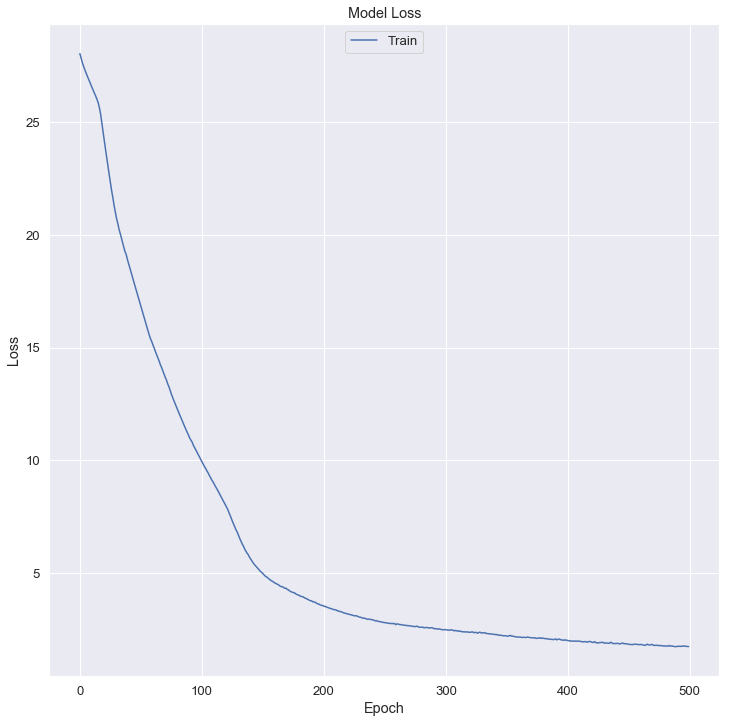

In [71]:
# REF [https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/]

plt.figure(figsize=(12, 12))
# summarize history for loss
plt.plot(hist.history["loss"])
#plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Val"], loc="upper center")
plt.show()

#Save loss value to csv
Results = repr(model_eval)
import csv
#fields = ['Loss','Result']
with open('results.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=' ')
    writer.writerow('Loss')
    writer.writerow(Results)

**TEST THE MODEL**

The `model.fit` function iterates over the data set reducing the cost value until it reaches its minimum and outputs the result of the loss function. It can also be calculated independently using the `model.evaluate` function the result of which is seen below.

# MODEL EVALUATION ON THE TEST SET 

As calculated above

In [72]:
#Evaluate the performance of the model - output the loss function on the training set
model_eval = model.evaluate(x_test, y_test)

print ("Loss value is:", float("{0:.3f}".format(model_eval)))


406/406 [==============================] - 0s 20us/step
Loss value is: 967.49


The above loss value equates to the model inaccuracy i.e the average prediction on the training set is out by the loss value

**QUICK COMPARISON OF ACTUAL V PREDICTED PRICES**

In [73]:
#print first ten rows of dataset prices column
first_10_Prices = bos.iloc[0:10, 13:15]

print("The first ten actual house price are \n", first_10_Prices)

y_true = bos['PRICE']
y_pred = model.predict(x)

#Output first 10 predictions
print("The first ten model predictions of house price are \n",y_pred[:10])


The first ten actual house price are 
    PRICE
0   24.0
1   21.6
2   34.7
3   33.4
4   36.2
5   28.7
6   22.9
7   27.1
8   16.5
9   18.9
The first ten model predictions of house price are 
 [[591.2674 ]
 [585.55475]
 [553.2793 ]
 [511.8537 ]
 [521.2695 ]
 [521.75946]
 [616.6868 ]
 [663.2707 ]
 [659.67847]
 [637.6946 ]]


A quick comparison of the first ten actual v predicted house prices above reveals differences which vary from one comparison to another. From this we can summise that the model does not reliably predict house prices


Learnings in the **TEST MODEL** above from REF [https://www.youtube.com/watch?v=zinEPDj7SD8]


**PLOT OF PREDICTED HOUSE PRICE V ACTUAL**

The following plot is of the first 100 actual V predicted house prices

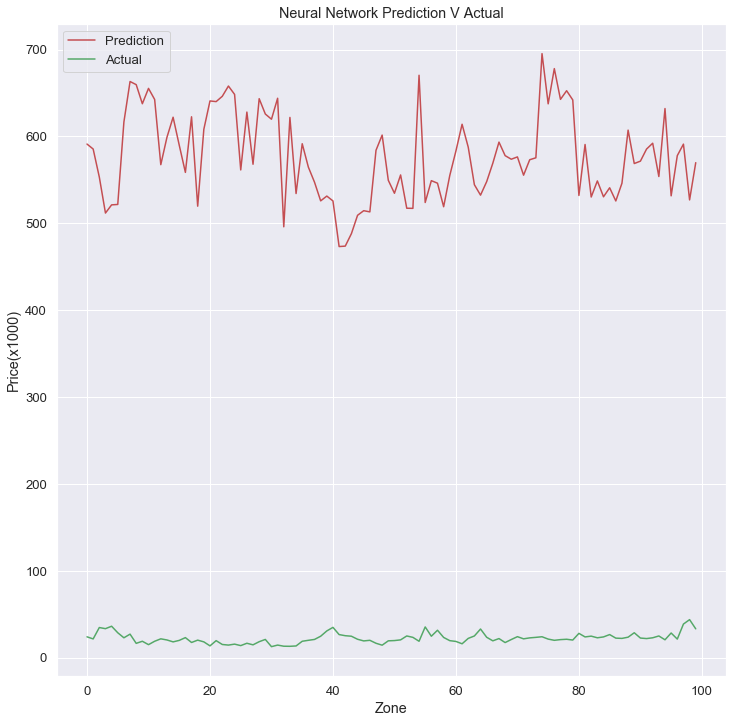

In [74]:
#Plot of actual v predicted price of first 100 data points
plt.figure(figsize=(12, 12))
plt.plot(y_pred[:100], 'r-', label ='Prediction')
plt.plot(y_true[:100], 'g', label = 'Actual')
plt.title("Neural Network Prediction V Actual")
plt.ylabel("Price(x1000)")
plt.xlabel("Zone")
plt.legend(["Prediction", "Actual"], loc="upper left")
plt.show()

In [75]:
#Evaluate the Mean-Squared error

error = np.mean(kr.losses.mean_absolute_error(y_true, y_pred))

#MSE of first 100 predictions
print ("The Mean Absolute error is", error) 
      

The Mean Absolute error is 659.9562


As can be seen above the mean absolute error is high on our test set and shows that the model is not accurately predicting unknowns but has a lower loss value on the training set.

Models which produce a low loss function but fail to accurately predict test data may be over-fitting the test set i.e the model does not generalise well to unknowns. Various approaches are advised to prevent over-fitting


REF: [Hands-On Machine Learning with Scikit-Learn, KERAS & TensorFlow; Geron, A.; O'Reilly; 2019, 2nd Ed, p.27]
REF: [ https://towardsdatascience.com/soon-or-later-you-will-face-this-problem-c5f204e9f55a ]

**REDUCTION OF OVERFITTING**

Models which produce a low loss function but fail to accurately predict test data may be over-fitting the test set. Various approaches are advised to prevent over-fitting

Originally the test_set had been set to 0.5 of the data. Changing it to 0.2 had no tangible effect on the model.

This article referenced from 'towardsdatascience' Discuss

REF [https://towardsdatascience.com/a-gentle-journey-from-linear-regression-to-neural-networks-68881590760e] 

* Reducing the number of parameters of the networks
* Getting more data or 
* Using explicit regularisers (in the loss function or through a dropout process)

It isn't possible to get more data as our dataset is limited. However it is possible to reduce the number of parameters.Regularisation may also help. The authors advise that neural networks with many parameters can be prone to overfitting.  REF: [Hands-On Machine Learning with Scikit-Learn, KERAS & TensorFlow; Geron, A.; O'Reilly; 2019, 2nd Ed, p.364-374]

Regularisation is defined as "constraining the model to make it simpler and reduce the risk of overfitting. `kernel_regularizer` and `activity_regularizer` are both regularisation functions in keras used above.

 REF: [Hands-On Machine Learning with Scikit-Learn, KERAS & TensorFlow; Geron, A.; O'Reilly; 2019, 2nd Ed, p.28]

**Next Steps:** 

* Reduce the complexity of the model

Very low loss value and a reduction of MSE obtained by reducing the number of parameters to:

**x = bos['ZN', 'PTRATIO, 'LSTAT', 'RM']**

**y = bos['PRICE']**

These x values were chosen as they showed the highest positive correlation lowest (negative) correlation with House price in the correlation matrix output in the inferential statistics section. The justification being that these variables had the highest influence on median house price of all the variables in the dataset

Removal of the Charles River Dummy Variable had no effect on accuracy

**LITERATURE SEARCH & OTHER APPROACHES**

These authors https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/ achieved a mean squared error of 23.33 similar to what we achieved using similar model parameters to us.

https://github.com/DavidCico/Boston-House-Prices-With-Regression-Machine-Learning-and-Keras-Deep-Learning/blob/master/Boston_deeplearning_regression.ipynb also achieved a MSE of 25-27 also using similar optimisation functions

This author REF [https://www.kaggle.com/amundtveit/neural-network-model-for-house-prices-keras] used an approach on another house price dataset to remove outliers. Their house price dataset  had 1460 row with 81 features. 38 continuous features and 43 categorical feature. They excluded categorical features from their model. The appeared to generate a good regression line of predicted vs actual prices (but didn't publish a MSE)

As  can be seen from the box plots in the inferential statistics section, some of the house price data that does not border the Charles River contains outliers. It may be a useful approach to exclude these points. Additionally it can be observed that in the distribution of house prices bordering/not bordering the river that there is a cluster of prices at 50,000. Intuitively it may be a case that the data for house prices was capped at 50,000 for some reason.

In [76]:
#copied from https://www.kaggle.com/amundtveit/neural-network-model-for-house-prices-keras/comments

#from sklearn.ensemble import IsolationForest

#clf = IsolationForest(max_samples = 100, random_state = 42)
#clf.fit(y_train)
#y_noano = clf.predict(y_train)
#y_noano = pd.DataFrame(y_noano, columns = ['Top'])
#y_noano[y_noano['Top'] == 1].index.values

#y_train2 = y_train.iloc[y_noano[y_noano['Top'] == 1].index.values]
#y_train2.reset_index(drop = True, inplace = True)
#print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
#print("Number of rows without outliers:", y_train.shape[0])

The `IsolationForest` `scikitlearn` function above has isolated and identified 36 outliers in our training set.

try https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

**SOME CODE TO REMOVE ALL VALUES = 50**

In [77]:
X = y_true

#lambda function to only include values not equal to 50
X = list(filter(lambda x: x!= 50.0, X))

#print(X)

**Calculate the error on the test set when 50 is excluded from price**

In [78]:
error = np.mean(kr.losses.mean_absolute_error(X, y_pred))
print("Mean Absolute Error =",(error))

Mean Absolute Error = 660.8531


The error value has dropped by excluding the price values at 50,000 dollars. It may now be worth investigating if removing all outliers from the dataset will improve prediction

**CALCULATE Z SCORES FOR OUTLIERS**

REF[https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/z-score/]

The z-score is the number of standard deviations a data point is from the mean

In [79]:
#REF [https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html]
z = np.abs(stats.zscore(bos))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]


In [80]:
 #outputs a new dataset excluding outliers where z score >3
bos_o =x[(z < 3).all(axis=1)]


Removing outliers did not have  substantial effect on the prediction accuracy

**Note: Dropping the number of epochs increases the loss value but decreases the error on test data. i.e. decreases overfitting but not enough to reduce the error on predictions substantially. May be a case for putting the `Early_stopping` function back in to the model.**

In [81]:
X = bos['PRICE']
Y = y_pred #(columns='pred price'))

#create two pandas dataframes
a = pd.DataFrame(X)

b = pd.DataFrame(Y, columns =['PRED_PRICE'])

#contatenate the two dataframes
result = pd.concat([a, b], axis=1)

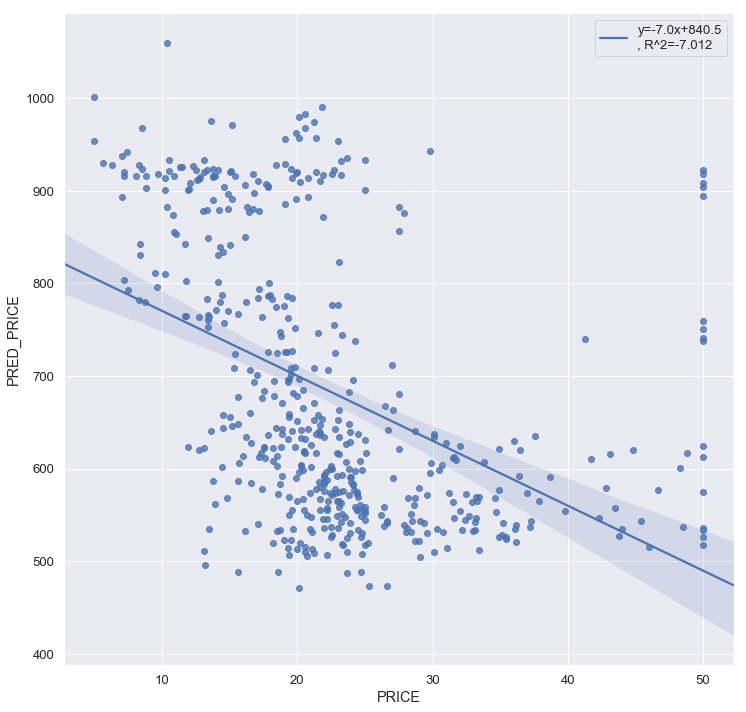

In [82]:
plt.figure(figsize=(12,12))

#sns.regplot(x= "PRICE", y ="PRED_PRICE", data = result)
#plt.plot(y, 'r-', label ='Prediction')
#plt.plot(x, 'g', label = 'Actual')
#plt.title("Linear Relationship: Neural Network Prediction V Actual")

#plt.show()
slope, intercept, r_value, p_value, std_err = stats.linregress(result['PRICE'],result['PRED_PRICE'])

# Display equation of the line and R^2
ax = sns.regplot(x="PRICE", y="PRED_PRICE", data=result, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}\n, R^2={0:.3f}".format(slope,intercept,r_value)})

# plot legend
ax.legend()

**PLOT OF PRICE V PREDICTED PRICE**

**Plotting the relationship between actual price and predicted price enables us to visualise the errors between the actual v predicted prices**

Where the prediction is accurate, a strong linear relationship should exist between the data.

The linear relationship plotted above does suggest a strong correlation netween actual and predicted results with an $R^2$ value. However this is what we expect and it is the output of a neural network and not a univariate relationship. It is however a useful visualisation. From the values that diverge from the line, it is easy to see how the model is not predicting unknowns as well as it could. 

Removal of variables which were not strongly correlated with Price improved both training and testing models

**ONE-WAY ANOVA ON ACTUAL V PREDICTED HOUSE PRICES**

In [83]:
Test_Statistic, p = stats.f_oneway(a,b)

print('Test Statistic = %.3f, p=%.4f' % (Test_Statistic, p))

Test Statistic = 10158.627, p=0.0000


From the above, the null hypothesis states that the mean house prices for Actual and Predicted are equal. Because the p-value is 0.0013, which is less than the significance level of 0.05, we can reject the null hypothesis and conclude that the house prices have different means.

**CONCLUSION**

Despite various pre-processing methods applied, cross validation and optimisation of the training model it can be concluded that the model is unable to accurately predict the house prices on the test set.
